In [1]:
def modify_weights(graph, edges_used, penalty=2):
    for edge in edges_used:
        if len(edge) == 3:
            u, v, key = edge
            graph[u][v][key]['length'] *= penalty
        elif len(edge) == 2:
            u, v = edge
            graph[u][v][0]['length'] *= penalty
        else:
            pass

In [2]:
def generate_routes(graph, start, end, num_routes=15):
    routes = []

    for i in range(num_routes):
        route = nx.shortest_path(graph, source=start, target=end, weight='length')
        routes.append(route)

        edges_used = list(zip(route[:-1], route[1:]))
        modify_weights(graph, edges_used)
    return routes

In [3]:
def calculate_overlap(route1, route2):
    shared_edges = set(zip(route1[:-1], route1[1:])) & set(zip(route2[:-1], route2[1:]))
    return len(shared_edges) / min(len(route1) - 1, len(route2) - 1)

In [4]:
def random_color():
    return "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

In [5]:
def bounding_box(lat1, lon1, lat2, lon2):
    min_lat = min(lat1, lat2)
    max_lat = max(lat1, lat2)
    min_lon = min(lon1, lon2)
    max_lon = max(lon1, lon2)
    return (min_lat, min_lon, max_lat, max_lon)

In [6]:
def get_routes(start_lat, start_lon, end_lat, end_lon, num_routes):
    north, west, south, east = bounding_box(start_lat, start_lon, end_lat, end_lon)
    #graph = ox.truncate.truncate_graph_bbox(graph, north, south, east, west, truncate_by_edge=True)
    print ("Start")
    graph = ox.graph_from_bbox(north, south, east, west, network_type='all', truncate_by_edge=True, retain_all=False)
    print ("yay")

    start_node = ox.distance.nearest_nodes(graph, X=start_lon, Y=start_lat)
    end_node = ox.distance.nearest_nodes(graph, X=end_lon, Y=end_lat)

    routes = generate_routes(graph, start_node, end_node, num_routes)
    for i in range(len(routes)):
        for j in range(i+1, len(routes)):
            overlap = calculate_overlap(routes[i], routes[j])
            print(f"Overlap between route {i} and route {j}: {overlap:.2f}")
        
    return routes

YOEST
Start
yay
Overlap between route 0 and route 1: 0.19
Overlap between route 0 and route 2: 0.22
Overlap between route 0 and route 3: 0.30
Overlap between route 0 and route 4: 0.21
Overlap between route 0 and route 5: 0.33
Overlap between route 0 and route 6: 0.18
Overlap between route 0 and route 7: 0.37
Overlap between route 0 and route 8: 0.21
Overlap between route 0 and route 9: 0.43
Overlap between route 0 and route 10: 0.26
Overlap between route 0 and route 11: 0.29
Overlap between route 0 and route 12: 0.21
Overlap between route 0 and route 13: 0.27
Overlap between route 0 and route 14: 0.17
Overlap between route 1 and route 2: 0.06
Overlap between route 1 and route 3: 0.29
Overlap between route 1 and route 4: 0.30
Overlap between route 1 and route 5: 0.17
Overlap between route 1 and route 6: 0.19
Overlap between route 1 and route 7: 0.14
Overlap between route 1 and route 8: 0.15
Overlap between route 1 and route 9: 0.28
Overlap between route 1 and route 10: 0.34
Overlap betw

AttributeError: 'NoneType' object has no attribute 'values'

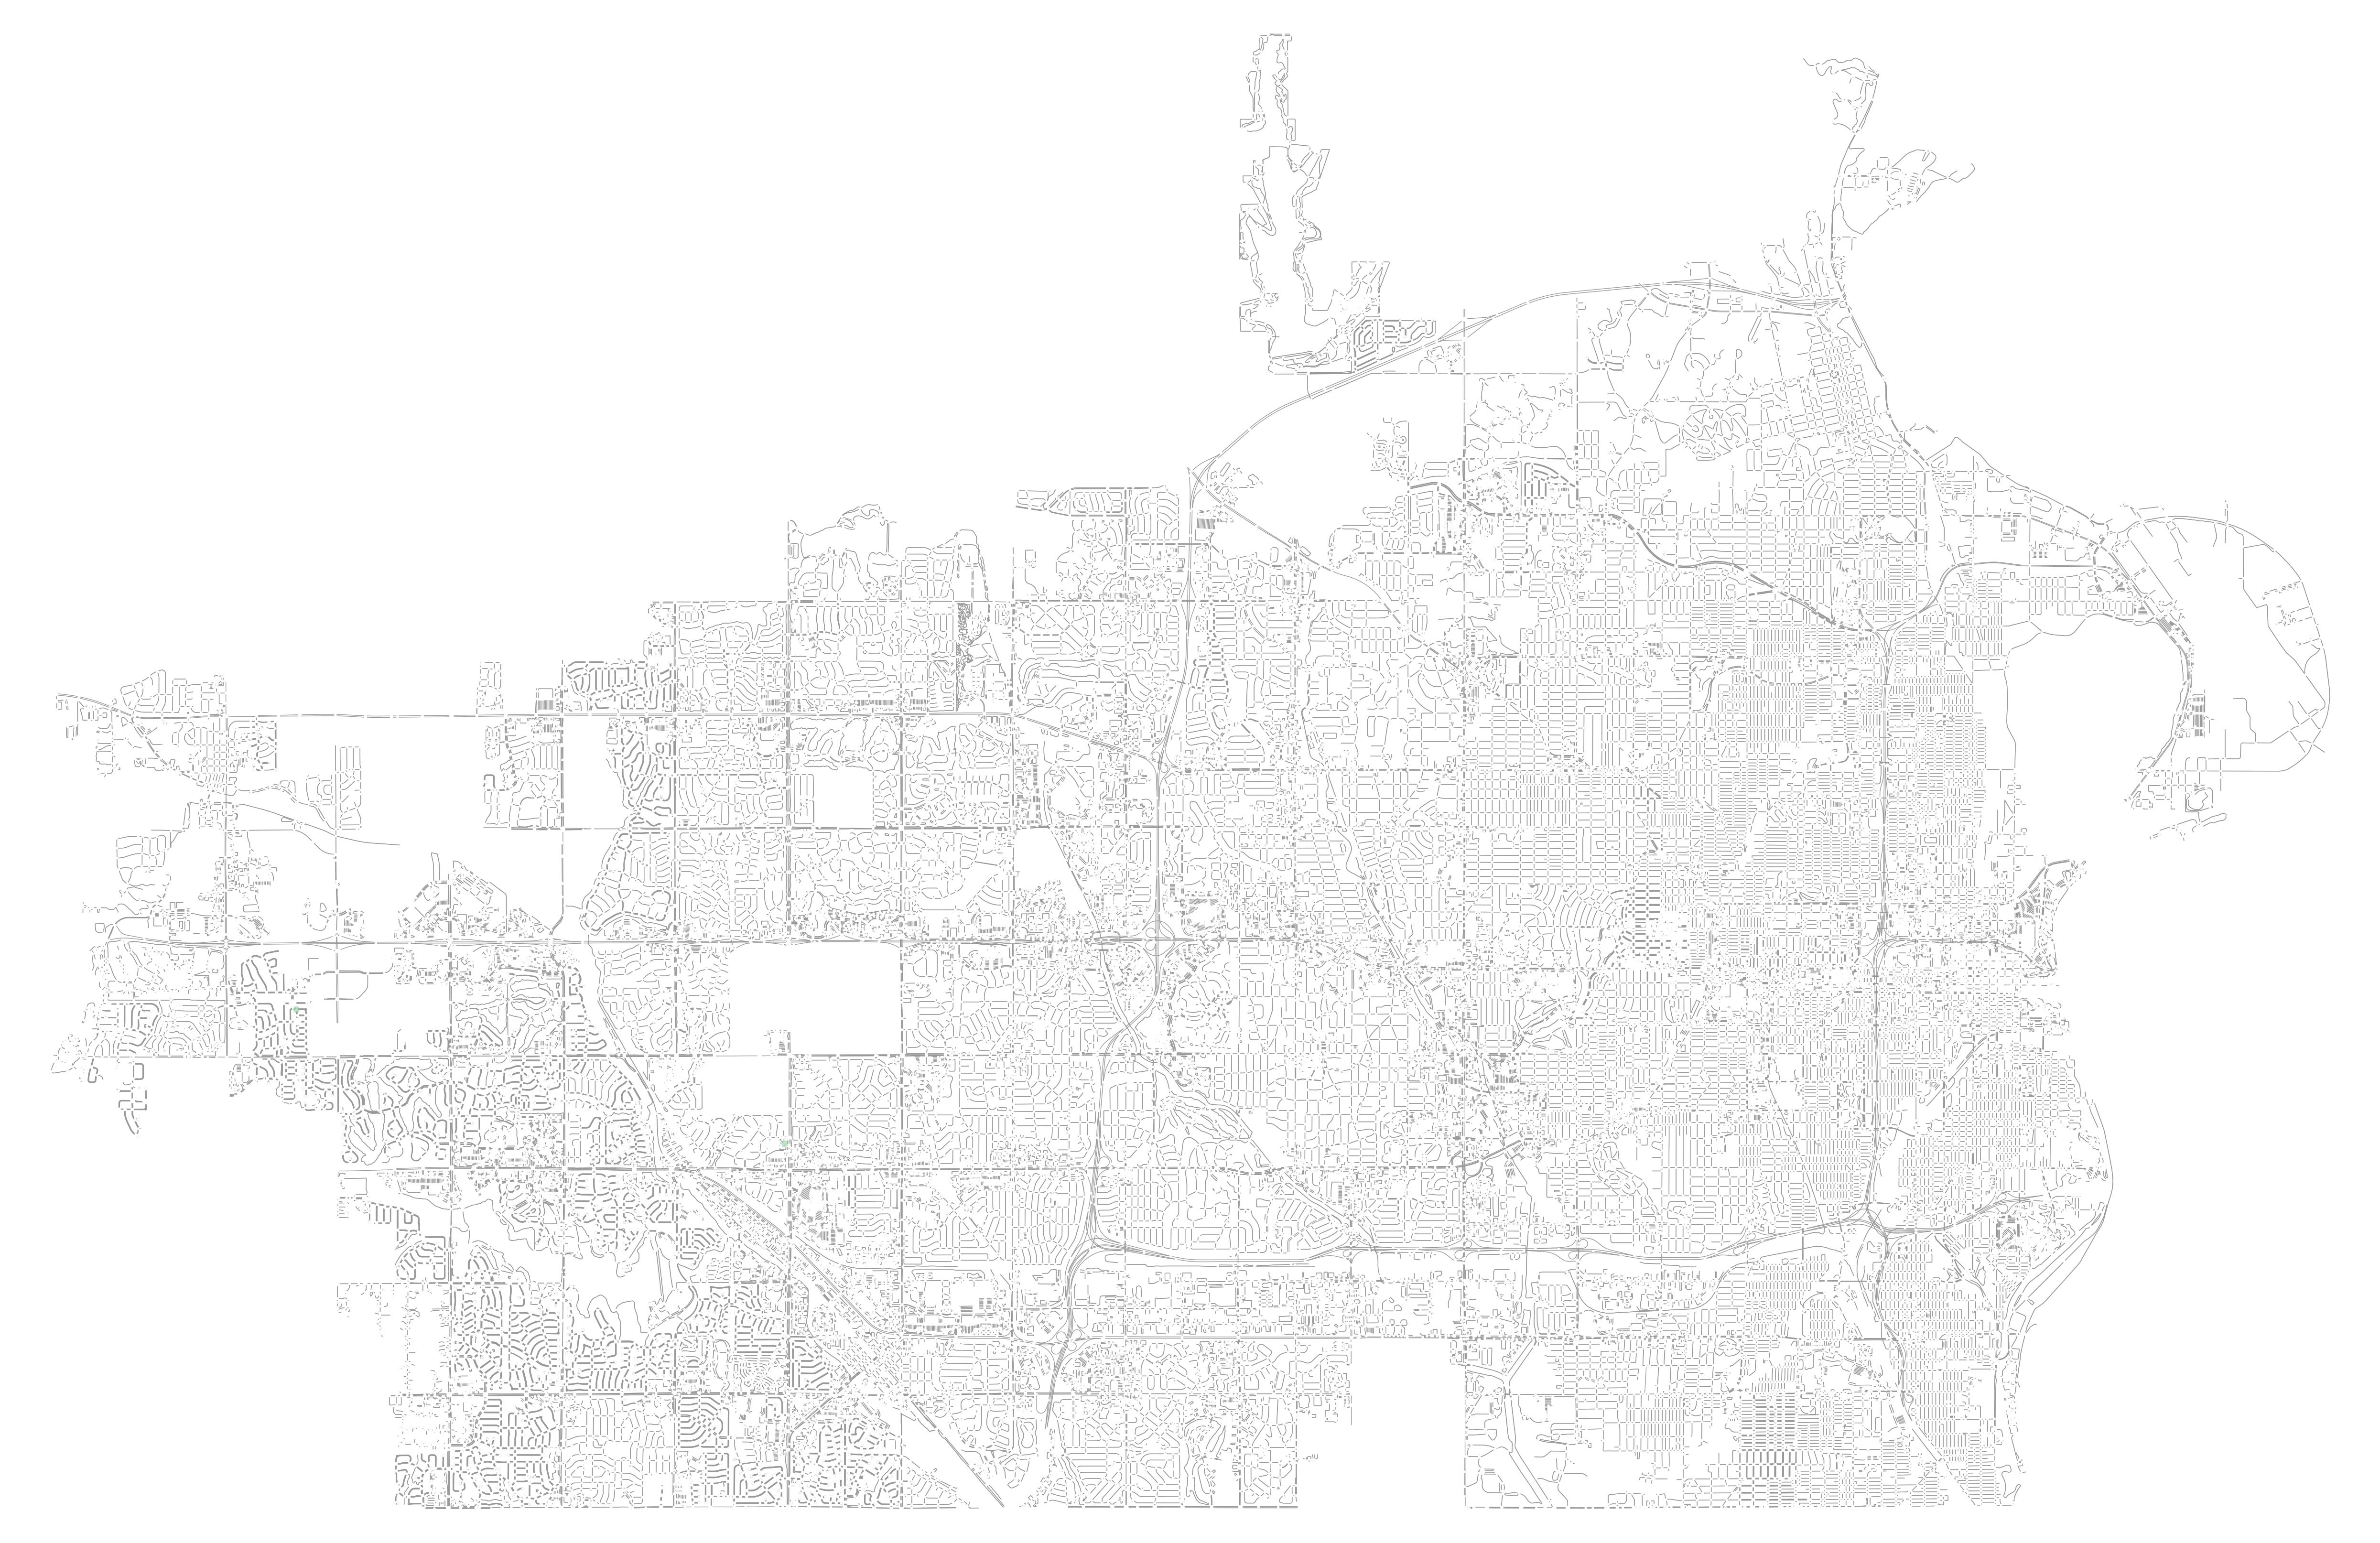

In [9]:
%matplotlib inline
import osmnx as ox
import networkx as nx
import random

ox.settings.use_cache = True
ox.settings.log_console = True
ox.settings.overpass_endpoint = "http://52.201.224.66:12345/api"
ox.settings.nominatim_endpoint = "http://52.201.224.66:8080/"
ox.settings.overpass_rate_limit = False

#graph = ox.graph_from_place("Omaha, Nebraska")
#start = random.choice(list(graph.nodes()))
#end = random.choice(list(graph.nodes()))
print("YOEST")
#print(start)

#start_node = graph.nodes[start];
#end_node = graph.nodes[end];

#print(start_node["x"])
#print(start_node["y"])

#print(end_node["x"])
#print(end_node["y"])


#start_lat = 40.82731943670903
#start_lon = -96.7000475297977
#end_lat = 41.25902656723834
#end_lon = -96.01073894919081

start_lat = 41.257727
start_lon = -96.2219951
end_lat = 41.234788
end_lon = -96.1393148

num_routes = 15
routes = get_routes(start_lat, start_lon, end_lat, end_lon, num_routes)

num_routes = len(routes)
colors = [random_color() for _ in range(num_routes)]

ox.plot_graph_routes(graph, routes, figsize=(64, 64), route_linewidths=6, route_colors=colors, bgcolor='white')
print(json.dumps(routes))